# **Using dataset on WNS (Holdings) Limited provided by Analytics Vidyha WNS Analytics Hackathon 2018, I would try to predict promotion of employees.**

# **1. Import packages and dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)
import cufflinks as cf
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
import scikitplot as skplt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
import warnings
#plt.style.use(['dark_background'])
%matplotlib inline
warnings.filterwarnings('ignore')

/home/angps/anaconda3/envs/angps/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/home/angps/anaconda3/envs/angps/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [2]:
direc = "/home/angps/Documents/Data-Analysis-Blog/WNS_Analytics_Hackathon/"
train = pd.read_csv(direc + "train_LZdllcl.csv")
test = pd.read_csv(direc + "test_2umaH9m.csv")

# **2. Exploratory Analysis**

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.shape

(54808, 14)

In [5]:
train.describe()  #5-number summary for numerical columns

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


**Dealing with Missing Values**

**Checking for missing values**

In [6]:
for i in train.columns:
    print (i + ": "+str(sum(train[i].isnull()))+" missing values")

employee_id: 0 missing values
department: 0 missing values
region: 0 missing values
education: 2409 missing values
gender: 0 missing values
recruitment_channel: 0 missing values
no_of_trainings: 0 missing values
age: 0 missing values
previous_year_rating: 4124 missing values
length_of_service: 0 missing values
KPIs_met >80%: 0 missing values
awards_won?: 0 missing values
avg_training_score: 0 missing values
is_promoted: 0 missing values



Only education and previous year rating have missing values. We will remove the missing values since the number of rows that will be removed is small in comparison with the amount of rows we have.

In [7]:
train = train.dropna()
train.shape

(48660, 14)

In [8]:
train["high_prev_rating"] = np.where(train["previous_year_rating"]>=3,1,0)
train["low_prev_rating"] = np.where(train["previous_year_rating"]<3,1,0)
train = train.drop(["previous_year_rating"],axis=1)
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,high_prev_rating,low_prev_rating
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,8,1,0,49,0,1,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,4,0,0,60,0,1,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,7,0,0,50,0,1,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,10,0,0,50,0,0,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,2,0,0,73,0,1,0


**2.1 Let's start by visualising the distribution of each columns.**

**2.1.1 Distribution of categorical features**

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



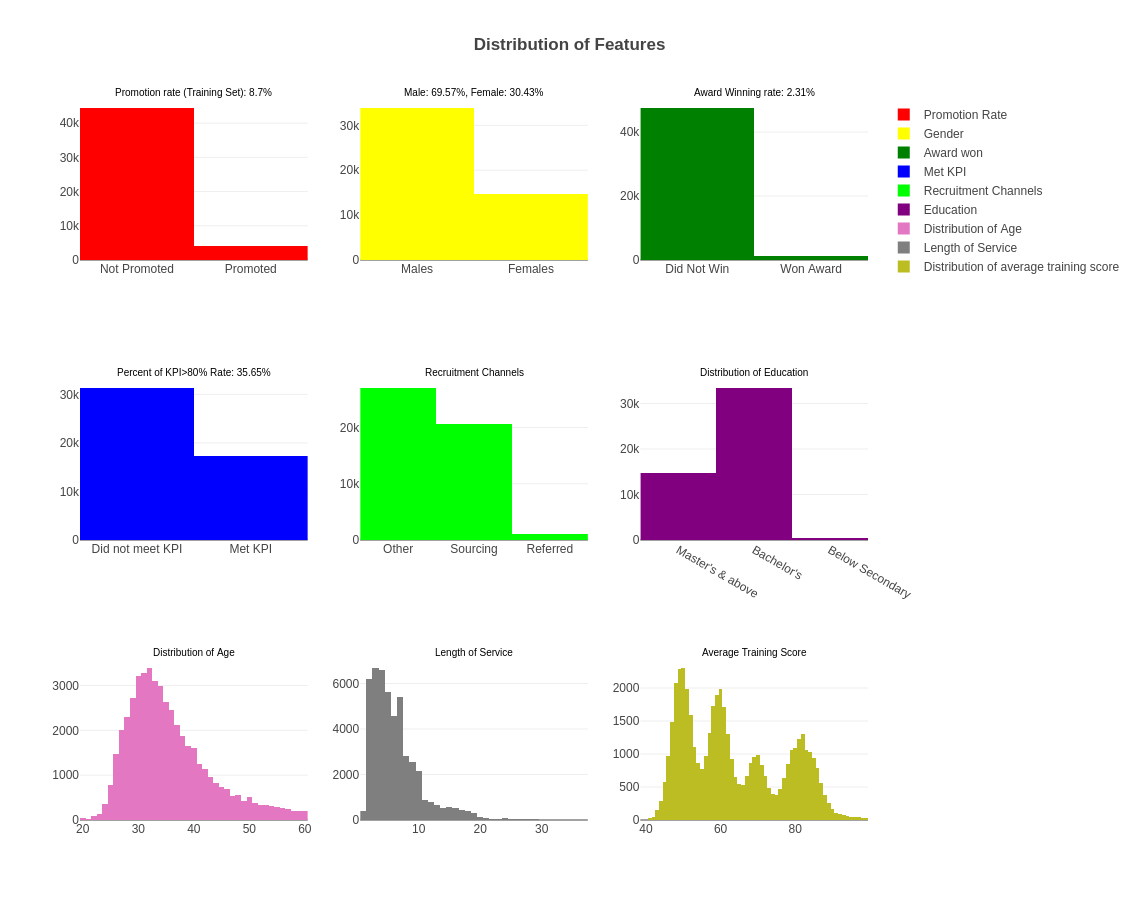

In [9]:
trace1 = go.Bar(
            x=['Not Promoted','Promoted'],
            y=[sum(train["is_promoted"]==0),sum(train["is_promoted"]==1)],
            marker=dict(color=["red","red"]),
            name="Promotion Rate",
    )

trace2 = go.Bar(
            x=['Males','Females'],
            y=[sum(train["gender"]=='m'),sum(train["gender"]=='f')],
            marker=dict(color=["yellow","yellow"]),
            name='Gender'
    )


trace3 = go.Bar(
            x=['Did Not Win','Won Award'],
            y=[sum(train["awards_won?"]==0),sum(train["awards_won?"]==1)],
            marker=dict(color=["green","green"]),
            name='Award won'
    
    )

trace4 = go.Bar(
            x=['Did not meet KPI','Met KPI'],
            y=[sum(train["KPIs_met >80%"]==0),sum(train["KPIs_met >80%"]==1)],
            marker=dict(color=["blue","blue"]),
            name='Met KPI'
    )

trace5 = go.Bar(
            x=['Other','Sourcing','Referred'],
            y=[sum(train["recruitment_channel"]=='other'),sum(train["recruitment_channel"]=='sourcing'),sum(train['recruitment_channel']=='referred')],
            marker=dict(color=["lime","lime","lime"]),
            name='Recruitment Channels'
    )

trace6 = go.Bar(
            x=list(train["education"].unique()),
            y=[sum(train["education"]==i) for i in list(train["education"].unique())],
            marker=dict(color=["purple","purple","purple"]),
            name="Education"
    )
trace7 = go.Histogram(x=train['age'],name="Distribution of Age")

trace8= go.Histogram(x=train['length_of_service'],name="Length of Service")

trace9=go.Histogram(x=train['avg_training_score'],name="Distribution of average training score")

fig = tools.make_subplots(rows=3, cols=3,
                          subplot_titles=["Promotion rate (Training Set): " + str(round(100*(sum(train["is_promoted"]==1)/train.shape[0]),2)) +"%",
                                         "Male: " + str(round(100*(sum(train["gender"]=="m")/train.shape[0]),2)) + "%, Female: " + str(round(100-100*(sum(train["gender"]=="m")/train.shape[0]),2))+"%",
                                         "Award Winning rate: " + str(round(100*(sum(train["awards_won?"]==1)/train.shape[0]),2)) +"%",
                                         "Percent of KPI>80% Rate: " + str(round(100*(sum(train["KPIs_met >80%"]==1)/train.shape[0]),2)) +"%",
                                         "Recruitment Channels",
                                         "Distribution of Education",
                                          "Distribution of Age",
                                          "Length of Service",
                                          "Average Training Score"
                                         ])
for i in fig['layout']['annotations']:
    i['font'] = dict(size=10,color='black')
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)
fig['layout'].update(height=900, width=900, title="<b>Distribution of Features<b>")
py.iplot(fig)


We can see that the distribution of age is slightly skewed to the right. The mean age is around 34.8 while the median age is 33 based on the 5-number summary. 

The distribution of the length of service is also right-skewed, with the mean 5.8 years and the median 5 years.

**2.1.2 Departments**

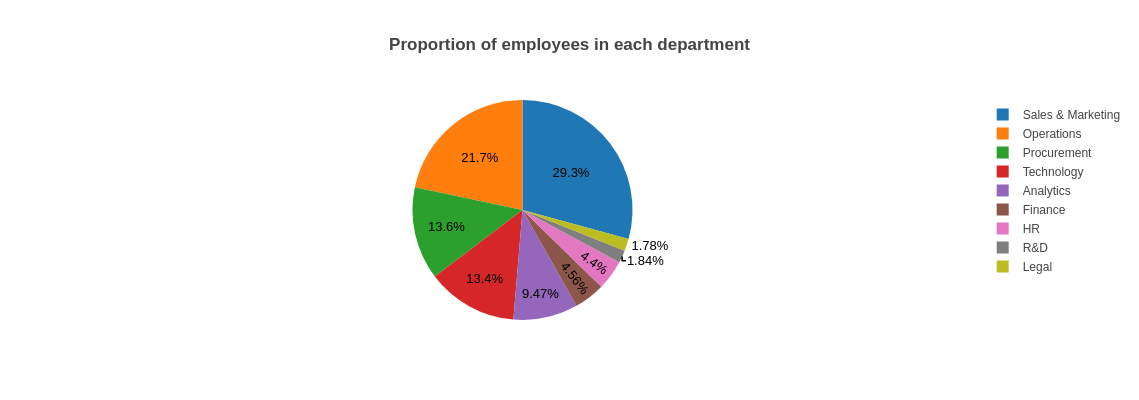

In [10]:
labels=list(train["department"].unique())
sizes=[sum(train["department"]==x) for x in labels]

trace = go.Pie(labels=labels, values=sizes,textfont=dict(size=13,color="black"))
layout = go.Layout(
    width=750,
    height=400,
    title = "<b>Proportion of employees in each department<b>",
)
fig=go.Figure([trace],layout=layout)
py.iplot(fig)

**2.1.3 Trainings**

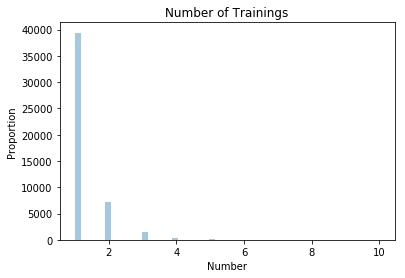

In [11]:
ax=sns.distplot(train["no_of_trainings"],kde=False)
plt.title("Number of Trainings")
plt.xlabel("Number")
plt.ylabel("Proportion")
for txt in ax.texts:
    txt.set_visible(False)

**2.2 Comparing variables by groups**

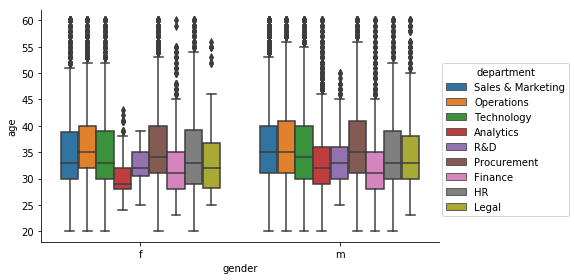

In [12]:
sns.factorplot(y="age",x="gender", hue="department",data=train,kind="box",size=4,aspect=8/5)

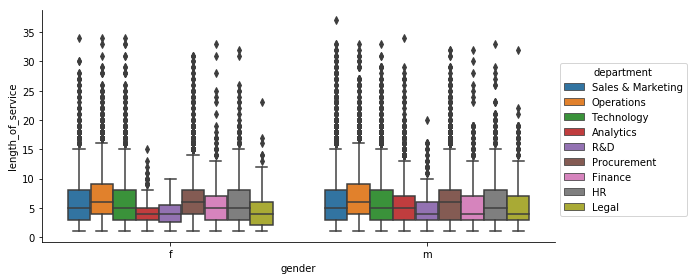

In [13]:
sns.factorplot(y="length_of_service",x="gender", hue="department",data=train,kind="box",size=4,aspect=8/4)

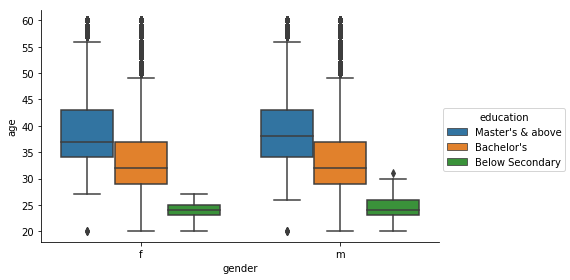

In [14]:
sns.factorplot(y="age",x="gender", hue="education",data=train,kind="box",size=4,aspect=8/5)

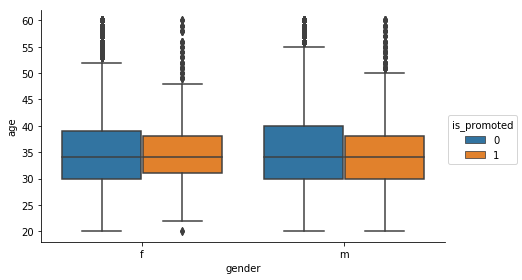

In [15]:
sns.factorplot(y="age",x="gender", hue="is_promoted",data=train,kind="box",size=4,aspect=8/5)

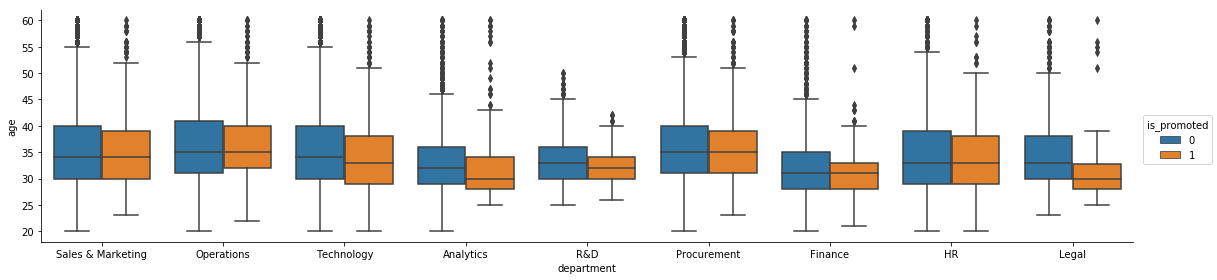

In [16]:
sns.factorplot(y="age",x="department", hue="is_promoted",data=train,kind="box",size=4,aspect=8/2)

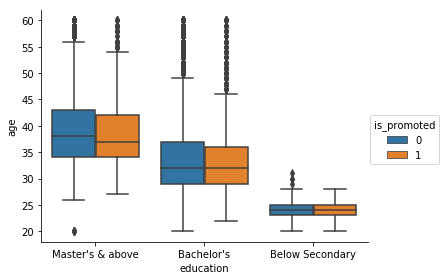

In [17]:
sns.factorplot(y="age",x="education", hue="is_promoted",data=train,kind="box",size=4,aspect=8/6)

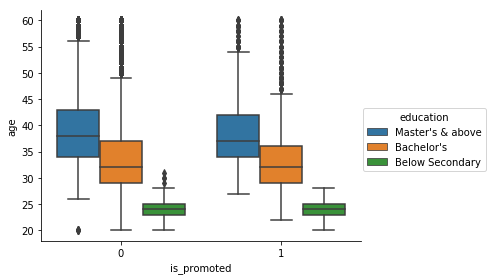

In [18]:
sns.factorplot(y="age",x="is_promoted", hue="education",data=train,kind="box",size=4,aspect=8/6)

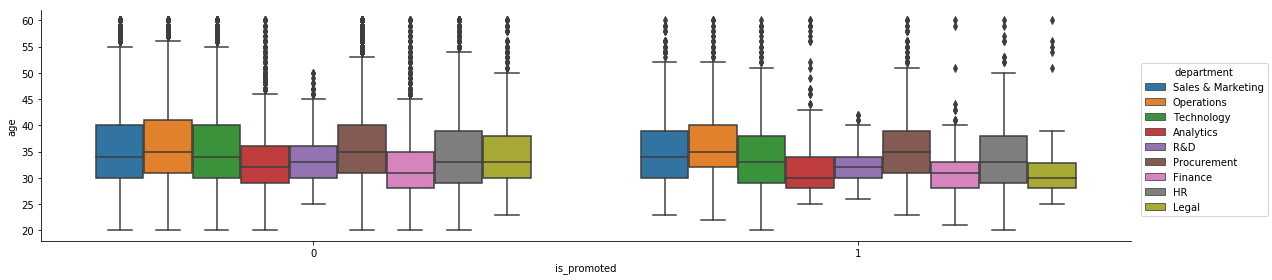

In [19]:
sns.factorplot(y="age",x="is_promoted", hue="department",data=train,kind="box",size=4,aspect=8/2)

**2.3 Let's check the promotion rate across different variables**

In [20]:
def promoted_distribution(variable):
    num = len(list(train[variable].unique()))
    data=[]
    for i in range(num):
        data.append(go.Bar(
            x=['Promoted','Not Promoted'],
            y=[train[train['is_promoted']==1][variable].value_counts()[i],train[train['is_promoted']==0][variable].value_counts()[i]],
            name=str(train[train['is_promoted']==1][variable].value_counts().index[i])))
    layout = go.Layout(
        width=500,
        height=400,
        barmode='stack',
        title = "Promotion rate among " + str(variable)
    )

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='stacked-bar')
    
    
def promoted_stacked_bar(variable):
    x1=list(train[variable].unique())
    trace1 = go.Bar(
        x=x1,
        y=[train[train[variable]==x1[i]]["is_promoted"].value_counts()[0] for i in range(len(x1))],
        name='Not Promoted'
    )
    trace2 = go.Bar(
        x=x1,
        y=[train[train[variable]==x1[i]]["is_promoted"].value_counts()[1] for i in range(len(x1))],
        name='Promoted'
    )
    layout = go.Layout(
        width=500,
        height=400,
        barmode='stack',
        title = "Promotion rate among " + str(variable)
    )
    data=[trace1,trace2]

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)


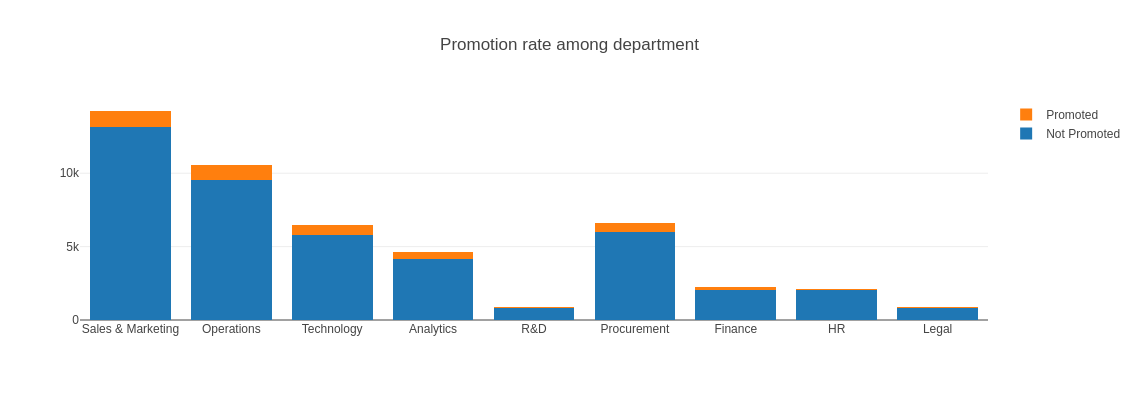

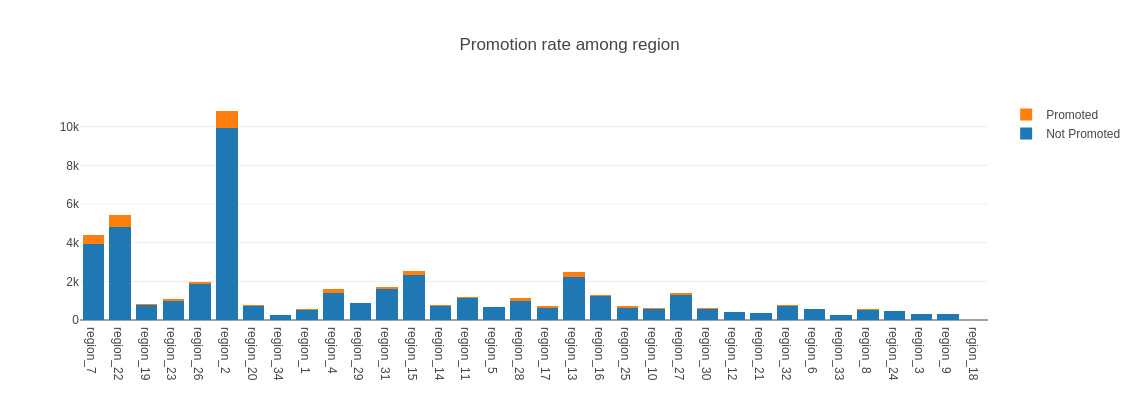

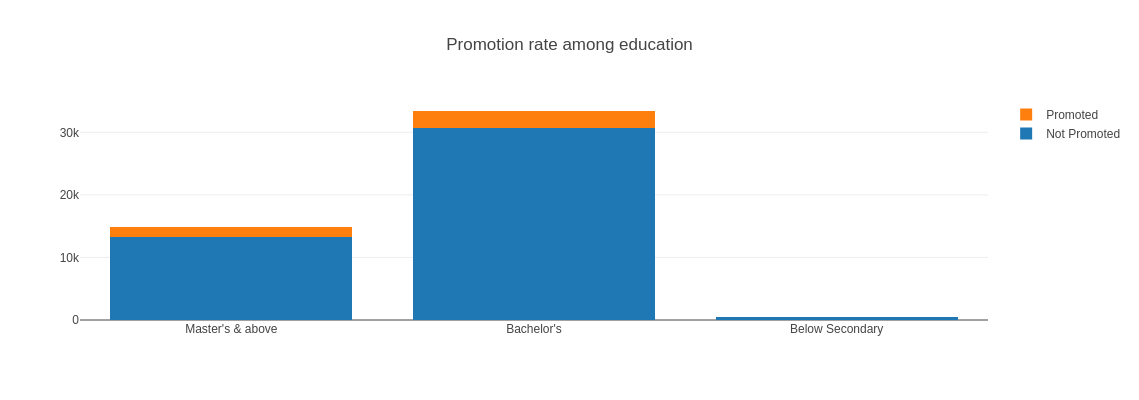

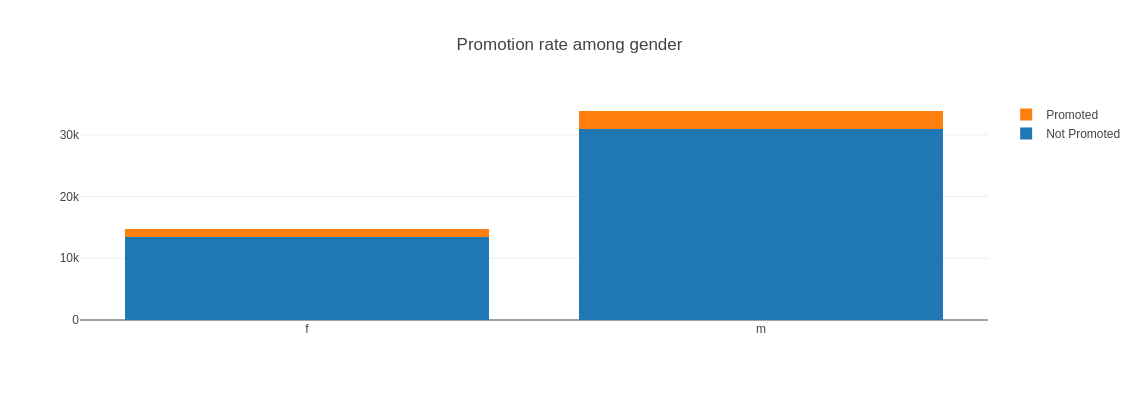

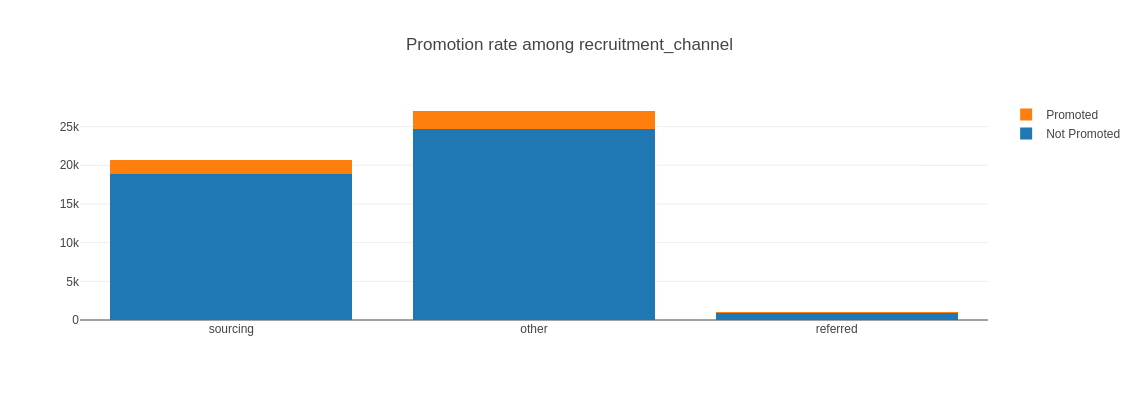

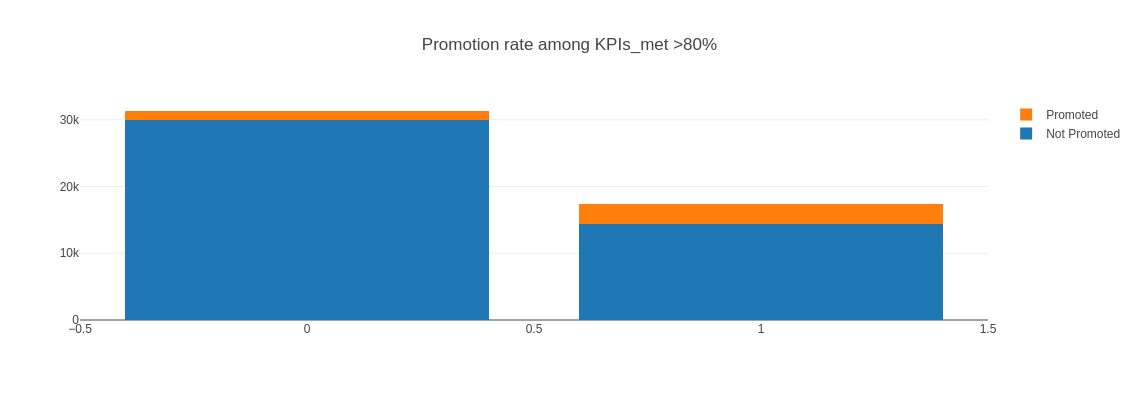

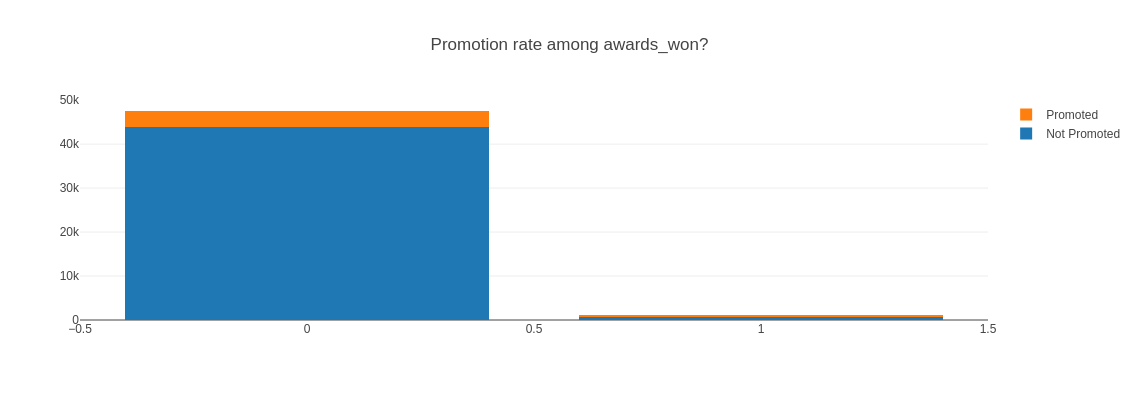

In [21]:
ls = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?']
for i in ls:
    promoted_stacked_bar(i)


We can see that there isn't any clear obvious bias linking any variables with promotion rate.

**Correlation Heatmap**

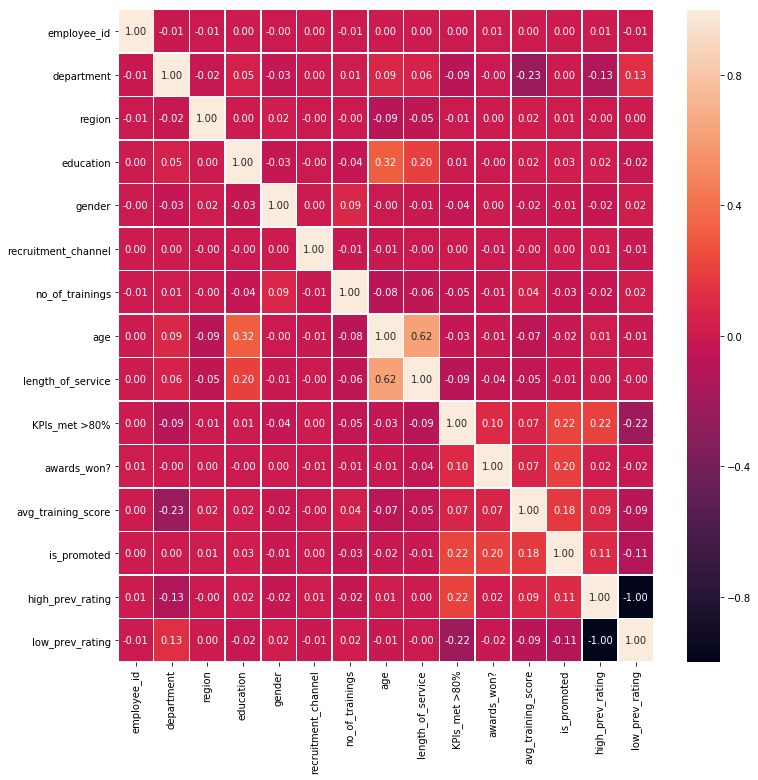

In [22]:
for cols in ["department","region","education","recruitment_channel","gender"]:
    train[cols] = train[cols].astype('category')
    train[cols] = train[cols].cat.codes
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

We see again from the correlation heatmap that almost all the variables are not directly correlated with promotion rate. The variables with the highest correlation (0.22 and 0.20 respectively) is whether the KPI is met and whether an award was won. 

# 3.Feature Engineering

We shall add another variable that states if an employee has won both awards and met KPI.

In [23]:
train["KPI&Award"] = np.where(((train["KPIs_met >80%"]==1) & (train["awards_won?"]==1)),1,0)

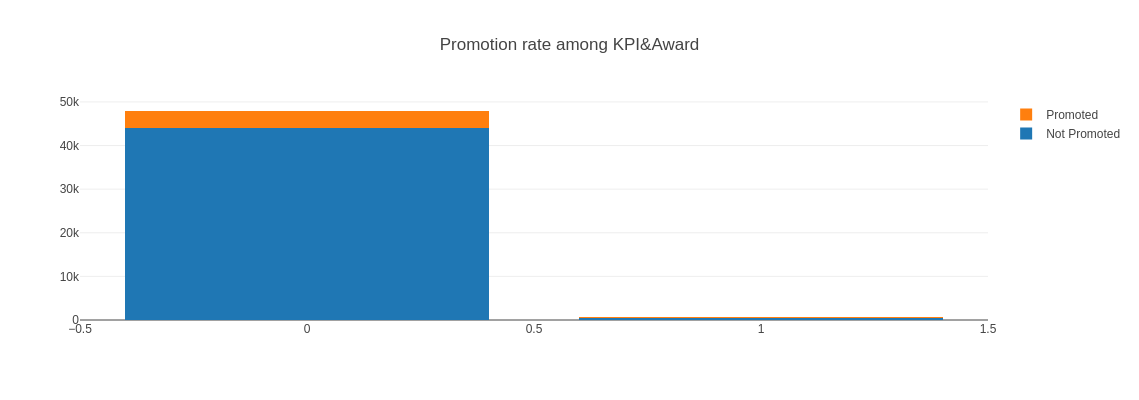

In [24]:
promoted_stacked_bar("KPI&Award")

In [25]:
train_features_eng = train
train_features_eng = train_features_eng.drop(['employee_id','recruitment_channel','no_of_trainings','gender','length_of_service','region'],axis=1) #features that are not needed

**Encode all categorical variables**

In [26]:
train_features_eng=pd.get_dummies(train_features_eng, columns=["department","education"], prefix=["Dept", "Eduacation"])
train_features_eng.head()

,age,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,high_prev_rating,low_prev_rating,KPI&Award,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6,Dept_7,Dept_8,Eduacation_0,Eduacation_1,Eduacation_2
0,35,1,0,49,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,30,0,0,60,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,34,0,0,50,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,39,0,0,50,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,45,0,0,73,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0


# 4. Classification models

The models will be optimised using GridSearchCV based on F1 score. F1 score gives a weighted average between precision and accuracy/recall. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

I have typed in some of the optimised parameters based on the GridSearchCV code output, then commented out the GridSearchCV codes to make the notebook run faster as it won't be re-optimised.

In [27]:
def train_f1(model):
    return round(f1_score(y_train,model.predict(x_train),average='macro'),2)

def test_f1(model):
    return round(f1_score(y_test,model.predict(x_test),average='macro'),2)

def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Promoted","Predicted No Promotion"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Promoted","Predicted No Promotion"]
    cm.index=["Actual Promoted","Actual No Promotion"]
    return cm.T

def confusion_matrix_model_train(model_used):
    cm=confusion_matrix(y_train,model_used.predict(x_train))
    col=["Predicted Promoted","Predicted No Promotion"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Promoted","Predicted No Promotion"]
    cm.index=["Actual Promoted","Actual No Promotion"]
    return cm.T

def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(6,6))

In [28]:
x1 = train_features_eng.drop(["is_promoted"],axis=1)
y1 = train_features_eng.loc[:,"is_promoted"]
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0,stratify=y1)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [29]:
x_train.head()

,age,KPIs_met >80%,awards_won?,avg_training_score,high_prev_rating,low_prev_rating,KPI&Award,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6,Dept_7,Dept_8,Eduacation_0,Eduacation_1,Eduacation_2
46344,30,1,0,61,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
27888,32,1,0,59,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
20723,41,1,0,76,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
11283,38,1,0,56,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
49921,28,1,1,62,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0


**Logistic Regression (Lasso)**

In [30]:
#param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5))
#log_reg1 = GridSearchCV(LogisticRegression(penalty="l1"),param_grid=param_grid,scoring="f1_macro")
log_reg1=LogisticRegression(penalty="l1",C=0.5)
log_reg1.fit(x_train,y_train)
#print(log_reg1.best_params_)
print ("In-sample F1 Score: " + str(train_f1(log_reg1)))
print ("Test F1 Score: " + str(test_f1(log_reg1)))
#confusion_matrix_model(log_reg1)

In-sample F1 Score: 0.68
Test F1 Score: 0.69


**Logistic Regression (Ridge)**

In [31]:
#param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
#log_reg2 = GridSearchCV(LogisticRegression(penalty="l2"),param_grid=param_grid,scoring="f1_macro")
log_reg2=LogisticRegression(penalty="l2",C=1)
log_reg2.fit(x_train,y_train)
#print(log_reg2.best_params_)
print ("In-sample F1 Score: " + str(train_f1(log_reg2)))
print ("Test F1 Score: " + str(test_f1(log_reg2)))
#confusion_matrix_model(log_reg2)

In-sample F1 Score: 0.67
Test F1 Score: 0.67


**SVC (RBF Kernel)**

In [32]:
#param_grid = dict(C=(0.001,0.01,0.1,0.5,1,2),gamma=(0.001,0.01,0.1,0.5,1,2))
#svc_rbf = GridSearchCV(SVC(kernel="rbf",random_state=0),param_grid=param_grid,scoring="f1_macro")
svc_rbf = SVC(kernel='rbf', gamma=0.001, C=0.01,random_state=0)
svc_rbf.fit(x_train, y_train)
#print(svc_rbf.best_params_)

print ("In-sample F1 Score: " + str(train_f1(svc_rbf)))
print ("Test F1 Score: " + str(test_f1(svc_rbf)))
#confusion_matrix_model(svc_rbf)

In-sample F1 Score: 0.48
Test F1 Score: 0.48


**KNN**

In [33]:
#param_grid = dict(n_neighbors=np.arange(10,70),weights=("uniform","distance"),p=(1,2))
#KNN = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,scoring="f1_macro")
KNN=KNeighborsClassifier(n_neighbors=30,p=1,weights='distance')
KNN.fit(x_train,y_train)
#print(KNN.best_params_)
print ("In-sample F1 Score: " + str(train_f1(KNN)))
print ("Test F1 Score: " + str(test_f1(KNN)))
#confusion_matrix_model(KNN)

In-sample F1 Score: 0.82
Test F1 Score: 0.63


**Decision Tree**

In [34]:
#param_grid = dict(max_depth=np.arange(4,10),min_samples_leaf=np.arange(1,8),min_samples_split=np.arange(2,8),max_leaf_nodes=np.arange(30,100,10))
#Dec_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,scoring="f1_macro")
Dec_tree=DecisionTreeClassifier(max_depth= 9, max_leaf_nodes= 60, min_samples_leaf= 7, min_samples_split= 2)
Dec_tree.fit(x_train,y_train)
#print(Dec_tree.best_params_)
print ("In-sample F1 Score: " + str(train_f1(Dec_tree)))
print ("Test F1 Score: " + str(test_f1(Dec_tree)))
#confusion_matrix_model(Dec_tree)

In-sample F1 Score: 0.73
Test F1 Score: 0.72


**Random Forest**

In [35]:
#param_grid = dict(max_depth=np.arange(3,10),min_samples_leaf=np.arange(1,10),min_samples_split=np.arange(2,6),max_leaf_nodes=np.arange(50,120,10))
#param_grid = dict(n_estimators = np.arange(50,500,50))
#ranfor = GridSearchCV(RandomForestClassifier(n_estimators=450,max_depth= 9, max_leaf_nodes=110, min_samples_leaf= 1, min_samples_split= 2,random_state=0),param_grid=param_grid,scoring="f1_macro")
#ranfor = GridSearchCV(RandomForestClassifier(max_depth= 7, max_leaf_nodes=100, min_samples_leaf= 6, min_samples_split= 2,random_state=0),param_grid=param_grid,scoring="accuracy")
ranfor = RandomForestClassifier(n_estimators=450,max_depth= 9, max_leaf_nodes=110, min_samples_leaf= 1, min_samples_split= 2,random_state=0)
ranfor.fit(x_train,y_train)
#print(ranfor.best_params_)
print ("In-sample F1 Score: " + str(train_f1(ranfor)))
print ("Test F1 Score: " + str(test_f1(ranfor)))
#confusion_matrix_model(ranfor)

In-sample F1 Score: 0.62
Test F1 Score: 0.62


**XGBoost**

In [36]:
#param_grid = dict(n_estimators=np.arange(50,500,50),max_depth=np.arange(6,12),learning_rate=(0.0001,0.001,0.01,0.1))
#xgclass = GridSearchCV(xgb.XGBClassifier(random_state=0),param_grid=param_grid,scoring="accuracy")
xgclass = xgb.XGBClassifier(max_depth=9, n_estimators=450, learning_rate=0.01)
xgclass.fit(x_train,y_train)
#print(xgclass.best_params_)
print ("In-sample F1 Score: " + str(train_f1(xgclass)))
print ("Test F1 Score: " + str(test_f1(xgclass)))
confusion_matrix_model(xgclass)

In-sample F1 Score: 0.75
Test F1 Score: 0.73


,Actual Promoted,Actual No Promotion
Predicted Promoted,8863,556
Predicted No Promotion,23,290


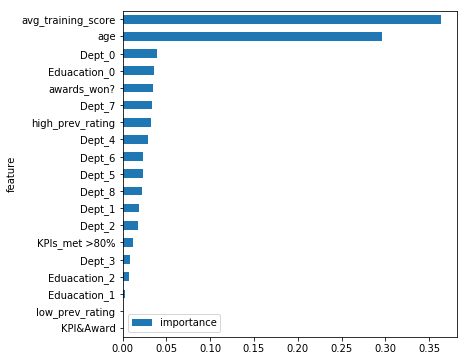

In [38]:
importance_of_features(xgclass)

In [37]:
Classifiers=["Logistic Regression (Lasso)","Logistic Regression (Ridge)","SVC (RBF Kernel)","K-Nearest Neighbours","Decision Tree","Random Forest","XGBoost"]
trainf1 = [train_f1(x) for x in [log_reg1,log_reg2,svc_rbf,KNN,Dec_tree,ranfor,xgclass]]
testf1 = [test_f1(x) for x in [log_reg1,log_reg2,svc_rbf,KNN,Dec_tree,ranfor,xgclass]]
cols=["Classifier","Training F1 Score","Test F1 Score"]
pred_results = pd.DataFrame(columns=cols)
pred_results["Classifier"]=Classifiers
pred_results["Training F1 Score"]=trainf1
pred_results["Test F1 Score"]=testf1
pred_results

,Classifier,Training F1 Score,Test F1 Score
0,Logistic Regression (Lasso),0.68,0.69
1,Logistic Regression (Ridge),0.67,0.67
2,SVC (RBF Kernel),0.48,0.48
3,K-Nearest Neighbours,0.82,0.63
4,Decision Tree,0.73,0.72
5,Random Forest,0.62,0.62
6,XGBoost,0.75,0.73


**XGBoost would be the model chosen due to the highest Test-set F1 score**